In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

In [6]:
# Load the data
df = pd.read_csv('hw4_data.csv')

# Extract columns into numpy arrays
model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
y_pred = df['prediction'].to_numpy()

In [7]:
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(true_class, y_pred).ravel()

# Calculate precision and recall
precision = precision_score(true_class, y_pred)
recall = recall_score(true_class, y_pred)

# Print the results
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

True Positives: 26
False Positives: 3
True Negatives: 150
False Negatives: 21
Precision: 0.896551724137931
Recall: 0.5531914893617021


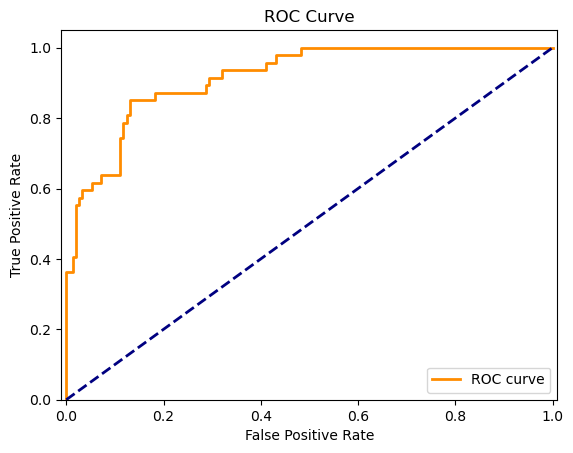

Minimum False Positive Rate with at least 90% True Positive Rate: 0.29411764705882354


In [19]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_class, model_output)
roc_auc = roc_auc_score(true_class, model_output)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01]) # provides more space for accomodating the ROC curve
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Find the minimum False Positive Rate with at least 90% True Positive Rate
min_fpr = None
for i in range(len(tpr)):
    if tpr[i] >= 0.9:
        min_fpr = fpr[i]
        break

print(f'Minimum False Positive Rate with at least 90% True Positive Rate: {min_fpr}')